# Projet Récursivité

### importation:

In [109]:
import numpy as np
import copy

### déclaration:

In [110]:
global N
#Définir une grille vide (n'importe quelle taille est acceptable)
N=8 #taille de l'échiquier 
grid=[[0]*N for i in range(N)]

### la premiére fonction "possible"

<div class="alert alert-success">
cette fonction verifie si est-il possible de placer une reine dans y, x ?
</div>

In [111]:
def possible(grid,y,x):# est-il possible de placer une reine dans y, x?

    l=len(grid) # Quelle est la taille de notre grille?
    
    for i in range(l): #check for reines sur la ligne y
        if grid[y][i]=='Q': #si existe retourner faux
            return False
    for i in range(l):  #check for reines sur la colonne x
        if grid[i][x]=='Q': #si existe retourner 0
            return False
        
    for i in range(l):  #boucle à travers toutes les lignes
        for j in range(l): #et colonnes
            if grid[i][j]=='Q':  #s'il y a une reine
                if abs(i - y) == abs(j - x): # et s'il y en a un autre sur une diagonale
                    return False #return false
    return True #si chaque vérification est effacée, nous pouvons retourner true

### la deuxième fonction "remplir"

<div class="alert alert-success">
les deux fonctions suivants permetent de remplir tous les cases de la matrice.
</div>

In [112]:
def remplir(T,i,j,k=1):
    for l in range(0,N):
        T[l][j]=k
    for c in range(0,N):
        T[i][c]=k
    ii, jj = i+1, j+1
    l = len(T)
    while ii < l and jj < l:
        T[ii][jj]=k
        ii, jj = ii + 1, jj + 1
    row=i
    col=j
    ii, jj = row+1, col-1
    while ii < l and jj >= 0:
        T[ii][jj]=k
        ii, jj = ii + 1, jj - 1 
    row=i
    col=j
    ii, jj = row-1, col+1
    while ii >= 0 and jj < l:
        T[ii][jj]=k
        ii, jj = ii - 1, jj + 1
        
    return T

In [113]:
def nreines(grid):
    s=0
    ss=0
    for i in range(N):
        for j in range(N):
            if grid[i][j]=='Q':
                s+=1
            if grid[i][j]==0:
                ss+=1
    if s==len(grid) and ss==0:
        return True

In [114]:
def resoudre(grid):
    
    l=len(grid) #longueur de notre grille    
    if nreines(grid):
        return grid
    for y in range(l): # pour chaque ligne
        for x in range(l): #pour chaque colonne
            if grid[y][x]==0: # on peut placer s'il n'y a pas de reine à la position donnée
                if possible(grid,y,x):#si vide, vérifie si on peut placer une reine
                    remplir(grid,y,x)
                    grid[y][x]='Q' # si nous pouvons, alors placez-le
                    resoudre(grid) #pass grid pour une solution récursive
                    #si nous nous retrouvons ici, cela signifie que nous avons cherché dans toutes les branches enfants
                    # nous réussissons donc retournez
                    if nreines(grid):
                            return grid
                    grid[y][x]=1
                    remplir(grid,y,x,0)
                      #remove la reine précédemment placée
                    

    return grid # signifie que nous avons recherché l'espace, nous pouvons retourner notre résultat


### Affichage de la matrice:

In [115]:
Solution = resoudre(copy.deepcopy(grid)) #obtenir la solution
print(np.matrix(Solution)) #Print la solution

[['Q' '1' '1' '1' '1' '1' '1' '1']
 ['1' '1' '1' '1' '1' 'Q' '1' '1']
 ['1' '1' '1' '1' '1' '1' '1' 'Q']
 ['1' '1' 'Q' '1' '1' '1' '1' '1']
 ['1' '1' '1' '1' '1' '1' 'Q' '1']
 ['1' '1' '1' 'Q' '1' '1' '1' '1']
 ['1' 'Q' '1' '1' '1' '1' '1' '1']
 ['1' '1' '1' '1' 'Q' '1' '1' '1']]


# visualiser la solution sur un échiquier

In [118]:
def plot(Solution):# Plot the solution on a chessboard
    import seaborn as sns
    import matplotlib.pyplot as plt
    import string
    
    l=len(grid)
    Ly=list(range(1,l+1))[::-1]
    ly = [str(i) for i in Ly]
    Lx=list(string.ascii_uppercase)
    lx=Lx[:l]
    
    plt.close('all')
    sns.set(font_scale = 2)
    plt.figure(figsize=(10,10))
    ax = plt.gca() #you first need to get the axis handle
    ax.set_aspect(1)
    sns.heatmap(Solution,linewidths=.8,cbar=False,linecolor='blue',
                cmap='Reds',center=0.4,xticklabels=lx,yticklabels=ly)

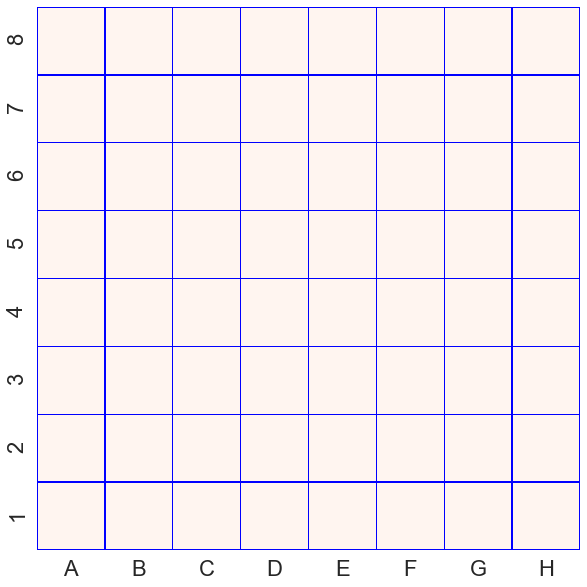

In [120]:
plot(grid)